## Indice
<br>1. [Intro](#Intro)</br>

<br>2. [Analisis](#Analisis)
   -  [Correlacion De los Datos](#Correlacion)
   -  [Correlacion lineal entre atributos](#CorrelacionDos)
   -  [Mapa de Calor](#MapaCalor)
   -  [Diferentes Atributos para la Predicción de NO2](#PredNO2)</br>
    
<br>3. [Modelos de predicción de NO2](#Modelos)
 -  [Regresor Logistico](#rl)
 -  [Naive Bayes](#nb)
 -  [Basado en Arboles](#arboles)
</br>
   

<a id="Intro"> </a>
### Introducción 

Para este entregable se utilizo Python como herramienta de análisis de datos con uso de librerías como sklearn, matplotlib, pandas entre otras. Usamos datos que se recogieron durante unos años sobre el clima y su calidad respecto a los factores contaminantes. En estos datos se cuenta con información de los siguientes atributos:


### Atributos 

    Dia,Dia_mes,MesDia_sem 
    Lluvia
    T_Max y T_Min
    Viento_MAX y Viento_Med
    
    SO2 - Dióxido de Azufre            [Medido en µm/m^3]
    CO - Monóxido de Carbono CO        [Medido en mg/m^3]
    NO - Monóxido de Nitrógeno         [Medido en µm/m^3]
    NO2- Dióxido de Nitrógeno          [Medido en µm/m^3]
    PM2.5 - Partículas < 2.5 µm        [Medido en µm/m^3]
    PM10 - Partículas < 10 µm          [Medido en µm/m^3]
    NOx - Óxidos de Nitrógeno          [Medido en µm/m^3]
    O3  - Ozono                        [Medido en µm/m^3]
    TOL - Tolueno TOL                  [Medido en µm/m^3]
    BEN  - Benceno                     [Medido en µm/m^3]
    EBE - Etilbenceno                  [Medido en µm/m^3]
    MXY - Metaxileno                   [Medido en µm/m^3]
    PXY - Paraxileno                   [Medido en µm/m^3]
    OXY - Ortoxileno                   [Medido en µm/m^3]
    TCH - Hidrocarburos totales        [Medido en mg/m^3]
    CH4 - Metano                       [Medido en mg/m^3]
    NMHC- Hidrocarburos nometánicos    [Medido en mg/m^3]

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as mtr
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut #Equivalente a kfolds n 
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import recall_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate
from sklearn import preprocessing
from sklearn.model_selection import train_test_split as train_crossVal
from statsmodels.stats.outliers_influence import variance_inflation_factor

<a id="Analisis"> </a>
## Analisis

In [2]:
#CARGA DE DATOS
meteo = pd.read_csv("meteo_calidad_2015.csv")

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None
meteo.head(meteo.size)

,Dia,Dia_mes,Mes,Dia_sem,Lluvia,T_MAX,T_MIN,Viento_MAX,Viento_MED,SO2,CO,NO,NO2,PM2.5,PM10,O3,TOL,BEN,EBE,TCH,NMCH,SO2_MAX,CO_MAX,NO_MAX,NO2_MAX,PM2.5_MAX,PM10_MAX,O3_MAX,TOL_MAX,BEN_MAX,EBE_MAX,TCH_MAX,NMCH_MAX
0,1,1,ENE,J,0.0,10.7,-0.6,14,5,14.100000,0.940000,137.541667,95.291667,28.666667,36.583333,10.500000,6.020000,2.200000,1.140000,2.076667,0.616667,20,1.3,244,127,33,64,20,9.1,3.9,1.9,2.44,1.00
1,2,2,ENE,V,0.0,12.5,-0.4,11,5,15.400000,0.960000,159.375000,102.583333,21.000000,28.750000,7.428571,7.460000,2.240000,1.360000,2.010000,0.580000,22,1.5,327,165,23,36,22,11.5,4.0,2.4,2.31,0.92
2,3,3,ENE,S,0.0,11.7,1.4,14,8,13.700000,0.840000,132.208333,90.125000,19.000000,23.916667,8.071429,6.950000,1.950000,1.116667,2.053333,0.566667,20,1.5,301,143,22,30,24,12.8,3.6,2.1,2.43,0.93
3,4,4,ENE,D,0.0,14.4,1.4,12,6,14.200000,0.920000,120.583333,90.458333,18.000000,21.416667,11.071429,6.516667,2.050000,1.300000,1.920000,0.560000,22,1.5,270,141,20,33,32,11.9,3.5,2.6,2.24,0.92
4,5,5,ENE,L,0.0,12.3,2.0,19,9,12.400000,0.800000,119.208333,84.416667,18.333333,23.166667,9.714286,6.266667,1.816667,1.133333,1.983333,0.566667,18,1.1,248,123,22,31,25,9.9,3.1,2.4,2.31,0.94
5,6,6,ENE,M,0.0,10.0,1.3,10,6,11.100000,0.760000,95.000000,75.791667,23.000000,25.166667,9.214286,5.183333,1.750000,0.800000,2.030000,0.590000,15,1.0,235,108,24,31,22,8.5,3.3,1.5,2.38,1.03
6,7,7,ENE,X,0.0,11.0,1.1,15,8,12.800000,0.840000,124.333333,91.791667,19.500000,25.166667,10.571429,6.583333,1.916667,1.200000,1.836667,0.516667,19,1.1,287,136,20,33,29,10.7,3.7,2.5,2.07,0.83
7,8,8,ENE,J,0.0,12.6,0.9,19,11,13.000000,0.730000,104.916667,86.875000,15.500000,22.416667,10.500000,7.850000,1.583333,1.566667,1.726667,0.450000,21,1.1,251,123,18,37,33,18.7,2.9,4.4,1.93,0.69
8,9,9,ENE,V,0.0,13.8,2.1,15,6,15.400000,0.990000,159.166667,102.875000,16.000000,26.750000,8.571429,11.533333,2.266667,2.066667,1.800000,0.496667,25,1.3,310,162,18,36,21,26.3,4.0,4.3,2.02,0.72
9,10,10,ENE,S,0.0,13.0,1.8,12,5,12.200000,0.760000,110.916667,84.000000,13.500000,19.833333,10.000000,8.166667,1.833333,1.633333,1.890000,0.586667,19,1.2,259,128,14,25,21,18.9,3.4,3.8,2.33,1.07


#### Quitando columnas

El conjunto de datos nos aporta columnas que no nos interesan mucho ya que tienen informacion no relevante o información que se puede conocer con las otras columnas :

Dia Del Mes - En realidad el valor númerico del mes no nos aporta ningún tipo de información, sino lo importante es saber el mes en si para saber en que época del año nos encontramos.



In [4]:
mNew=meteo.drop(['Dia_mes','Dia'],axis=1)

In [5]:
print(pd.isnull(mNew).sum())

Mes           0
Dia_sem       0
Lluvia        0
T_MAX         0
T_MIN         0
Viento_MAX    0
Viento_MED    0
SO2           0
CO            0
NO            0
NO2           0
PM2.5         0
PM10          0
O3            0
TOL           0
BEN           0
EBE           0
TCH           0
NMCH          0
SO2_MAX       0
CO_MAX        0
NO_MAX        0
NO2_MAX       0
PM2.5_MAX     0
PM10_MAX      0
O3_MAX        0
TOL_MAX       0
BEN_MAX       0
EBE_MAX       0
TCH_MAX       0
NMCH_MAX      0
dtype: int64


<a id="Correlacion"> </a>
## Correlación  De los Datos

In [6]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

corr=mNew.corr()
corr.head(31)


,Lluvia,T_MAX,T_MIN,Viento_MAX,Viento_MED,SO2,CO,NO,NO2,PM2.5,PM10,O3,TOL,BEN,EBE,TCH,NMCH,SO2_MAX,CO_MAX,NO_MAX,NO2_MAX,PM2.5_MAX,PM10_MAX,O3_MAX,TOL_MAX,BEN_MAX,EBE_MAX,TCH_MAX,NMCH_MAX
Lluvia,1.000000,-0.120502,-0.022188,0.160457,0.136657,-0.091098,-0.104398,-0.120208,-0.116430,-0.112520,-0.138634,-0.001896,-0.122786,-0.088257,-0.100662,-0.081980,-0.009639,-0.003306,-0.085118,-0.119712,-0.130772,-0.110517,-0.148561,0.027092,-0.092900,-0.058365,-0.074858,-0.098632,0.031177
T_MAX,-0.120502,1.000000,0.941484,0.149109,0.152920,-0.518337,-0.516272,-0.413155,-0.351299,-0.046637,0.341284,0.670940,-0.287661,-0.451611,-0.359652,-0.161814,-0.320321,-0.444214,-0.556368,-0.431650,-0.294018,-0.074646,0.279006,0.611183,-0.328394,-0.422632,-0.360226,-0.161037,-0.275766
T_MIN,-0.022188,0.941484,1.000000,0.185992,0.183890,-0.573904,-0.596274,-0.490523,-0.444391,-0.078788,0.303770,0.646309,-0.340951,-0.496874,-0.425257,-0.256612,-0.412725,-0.435499,-0.645704,-0.502518,-0.399331,-0.110633,0.225517,0.588075,-0.354989,-0.449193,-0.404112,-0.243916,-0.347277
Viento_MAX,0.160457,0.149109,0.185992,1.000000,0.919605,-0.542835,-0.601700,-0.593030,-0.662212,-0.532995,-0.273284,0.539917,-0.588522,-0.612824,-0.556013,-0.312400,0.046843,-0.313615,-0.483093,-0.592765,-0.603150,-0.541741,-0.298431,0.565617,-0.457100,-0.567464,-0.490170,-0.236809,0.148022
Viento_MED,0.136657,0.152920,0.183890,0.919605,1.000000,-0.521946,-0.577966,-0.573885,-0.629260,-0.497559,-0.237089,0.533407,-0.561302,-0.595788,-0.533405,-0.305803,0.045955,-0.301362,-0.464047,-0.568227,-0.561899,-0.509416,-0.262519,0.561531,-0.433468,-0.557729,-0.466444,-0.245110,0.140612
SO2,-0.091098,-0.518337,-0.573904,-0.542835,-0.521946,1.000000,0.934681,0.912839,0.843148,0.640697,0.303981,-0.769200,0.770688,0.875596,0.762961,0.378733,0.119884,0.754305,0.863303,0.928388,0.844065,0.666969,0.362112,-0.731610,0.609649,0.750767,0.632783,0.283942,-0.035790
CO,-0.104398,-0.516272,-0.596274,-0.601700,-0.577966,0.934681,1.000000,0.969395,0.927592,0.693357,0.356644,-0.791763,0.874640,0.955382,0.870380,0.500198,0.255442,0.590493,0.941297,0.964424,0.913700,0.718439,0.408921,-0.761076,0.730351,0.853201,0.745915,0.410836,0.085464
NO,-0.120208,-0.413155,-0.490523,-0.593030,-0.573885,0.912839,0.969395,1.000000,0.900853,0.698612,0.396162,-0.756577,0.905007,0.947410,0.895816,0.467102,0.159008,0.523988,0.888025,0.979737,0.892168,0.725074,0.444589,-0.746314,0.740656,0.820628,0.759730,0.386765,-0.011048
NO2,-0.116430,-0.351299,-0.444391,-0.662212,-0.629260,0.843148,0.927592,0.900853,1.000000,0.716179,0.458018,-0.755149,0.884177,0.912594,0.852031,0.559899,0.241330,0.503665,0.857245,0.891615,0.968068,0.741003,0.493428,-0.724918,0.742128,0.867254,0.743917,0.463247,0.061748
PM2.5,-0.112520,-0.046637,-0.078788,-0.532995,-0.497559,0.640697,0.693357,0.698612,0.716179,1.000000,0.828436,-0.477257,0.679641,0.712534,0.610600,0.348459,-0.021224,0.391398,0.583774,0.692830,0.706511,0.984581,0.826042,-0.471698,0.482388,0.653199,0.478040,0.274047,-0.124933


<a id="CorrelacionDos"> </a>
### Correlación lineal entre aributos

Primero estudiamos la correlación entre el CO y el O3 con respecto a la temperatura máxima. Como se puede ver en los siguientes gráficos, existe una alta relacion entre la temperatura y estos dos compuestos.

Se puede ver que estos compuestos reacciónan de manera contraria a la temperatura. Por un lado esta el C0 que tiene una mayor concentracion en temperaturas bajas y por otro el O3 que aumenta con la temperatura. Esto se puede deber a las reacciones quimicas que estos contaminantes tienen con estas temperaturas.

En cuanto al CO, se puede explicar su aumento durante temperaturas bajas ya que es un gas que se produce con la combustion de sustancias que se usan de forma cotidiana para generar calor. Entre mas frio, se hace mas uso de generadores de calor en la vida cotidiana de los ciudadanos por lo que se produce una condensación mas alta de este contaminante.

Por otro lado, se sabe que el Ozono (O3) aumenta con altas temperaturas y además en general por el aumento de trafico y contaminantes producidos por los vehiculos.

Esta relación contraria que tienen los componentes con la temperatura se ve muy clara en las dos graficas donde se muestra la recta de regresión donde se ve el aumento/decremento de cada uno mientras la temperatura aumenta.

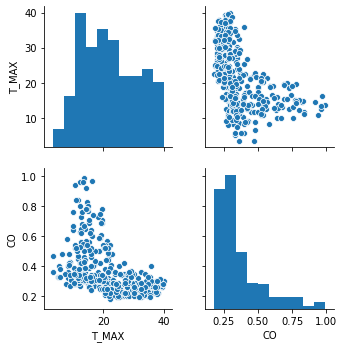

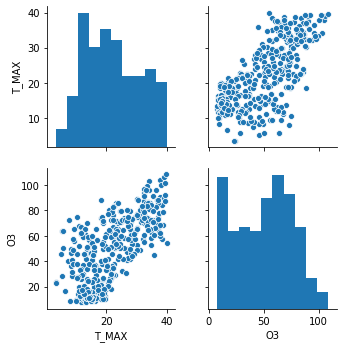

In [7]:
# Gráficos de dispersión

g = sns.pairplot(mNew, vars=["T_MAX", "CO"])

p = sns.pairplot(mNew, vars=["T_MAX", "O3"])

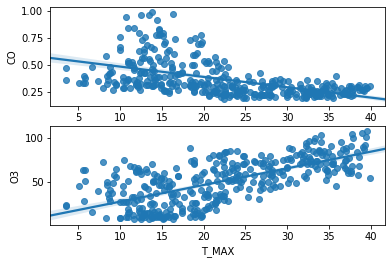

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=1)
plt.subplot(2,1,1)
sns.regplot(mNew["T_MAX"],mNew["CO"],data=mNew)
plt.subplot(2,1,2)
sns.regplot(mNew["T_MAX"],mNew["O3"],data=mNew)

<a id="MapaCalor"> </a>
### Mapa de Calor - Correlación

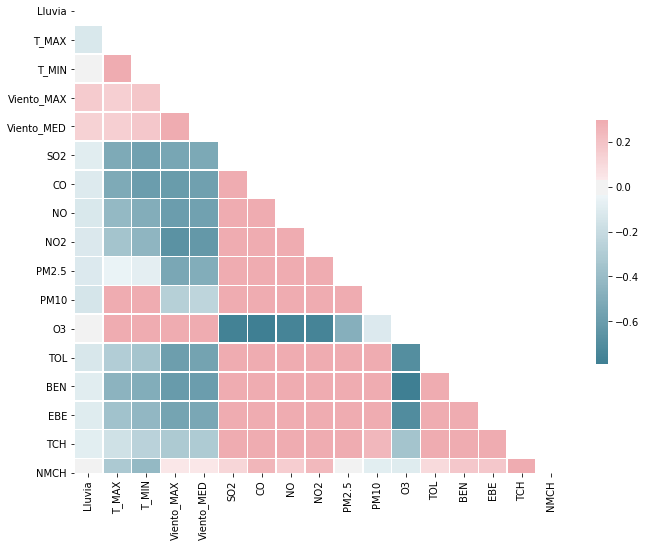

In [9]:
noMax = mNew.drop(['SO2_MAX','CO_MAX','NO_MAX','NO2_MAX','PM2.5_MAX','PM10_MAX','O3_MAX','TOL_MAX','BEN_MAX','EBE_MAX','TCH_MAX','NMCH_MAX'],axis=1)
corr=noMax.corr()   

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#  matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# COLORES 
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# DIBUJAR 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Decidimos quitar atributos como contaminante_max porque obviamente estarian correlacionados tanto con los contaminantes como con los atributos con los que los contaminantes simples estuvieran relacionados. 
Partimos la gráfica y pusimos colores contrastantes para que las relaciones se vieran claramente.

In [10]:
print("RELACIONES POSITIVAS FUERTES")
## RELACIONES MAS FUERTES               
indices = np.where((corr) > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
prev = ' '
for elem in indices:
    if elem[0] != prev:
        print('\n')
        print(elem[0] ,":")
        prev=elem[0]
    print(elem[1],"",end=' ')

print("\n")
print("RELACIONES NEGATIVAS FUERTES")
## RELACIONES MAS FUERTES               
indices = np.where(((corr) < -0.5) & ((corr) > -1.0))
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
prev = ' '
for elem in indices:
    if elem[0] != prev:
        print('\n')
        print(elem[0] ,":")
        prev=elem[0]
    print(elem[1],"",end=' ')
    
    

RELACIONES POSITIVAS FUERTES


T_MAX :
T_MIN  O3  

T_MIN :
O3  

Viento_MAX :
Viento_MED  O3  

Viento_MED :
O3  

SO2 :
CO  NO  NO2  PM2.5  TOL  BEN  EBE  

CO :
NO  NO2  PM2.5  TOL  BEN  EBE  TCH  

NO :
NO2  PM2.5  TOL  BEN  EBE  

NO2 :
PM2.5  TOL  BEN  EBE  TCH  

PM2.5 :
PM10  TOL  BEN  EBE  

TOL :
BEN  EBE  

BEN :
EBE  

TCH :
NMCH  

RELACIONES NEGATIVAS FUERTES


T_MAX :
SO2  CO  

T_MIN :
SO2  CO  

Viento_MAX :
SO2  CO  NO  NO2  PM2.5  TOL  BEN  EBE  

Viento_MED :
SO2  CO  NO  NO2  TOL  BEN  EBE  

SO2 :
O3  

CO :
O3  

NO :
O3  

NO2 :
O3  

O3 :
TOL  BEN  EBE  

### Conclusiones de la Correlación 
Mientras mayor sea el valor absoluto del coeficiente, más fuerte será la relación entre las variables.

**Dia**

Como se puede ver, aparte de la relación con NMCH (hexano) el cual actualmente tiene  uso  prohibido en las industrias, el dia de la semana no tiene relación con ninguon otro atributo, por lo que podemos despereciarlo. El hecho de la relacion con hexano se puede deber a que es un contaminante usado en fabricas, por lo que tendria sentido que fuera mas altos en dias laborables que dias como sabado y domingo.

**Mes**


**Lluvia**

No muestra ninguna correlación notable con el resto de atributos. Muchos de los contaminantes (como el ozono) necesitan de luz solar directa que, gracias a las  nubes que acompaán al viento y precipitaciones, es bloqueada por lo que limitan la formación de nueva contaminación del aire.

**Temperatura**

Se puede notar que la temperatura es un atributo que influye sobre la cantidad de elementos quimicos sobre todo en O3. Altas temperaturas provocan una mayor concentración de ozono.

Las moleculas mas relacionadas con eso son SO2  CO  O3

    **S02** - Es parte de la familia del azufre por lo tanto se asocia con la combustión gasolina en los vehículos y producción de energía y carbón en las centrales térmicas, procesos industriales y con las calefacciones domésticas, lo que explica su relación con épocas de frio y periodos laborables en fábricas.

    **CO**- El monoxido de carbono es un gas que se produce por una mala combustión de cualquiera de las sustancias susceptibles a ser quemadas para generar calor, por lo que explica que la concentración de este contaminante aumente con temperaturas bajas.

    **O3**- Se sabe que aumenta su concentración con temperaturas altas.

**Viento y lluvia**

El viento tambíen es un factor que influye mucho en la calidad del aire ya que mientras menos viento haya en el dia, mas se estanca la contaminación en el aire y se nota en las tablas anteriores porque los valores de la saturación de los son mas altas que cuando el viento es mayor. Es por lo anterior que el viento tiene una correlación alta con la mayoría de los atributos de quimicos.

**Moleculas**

Tiene mucha logica que existan relaciones entre las diferentes moleculas ya que muchas interactuan entre si.Entre los contaminantes existen dos grandes grupos, los primarios que son emitidos directamente al ambiente, mientras que un contaminante secundario se genera en él por  reacciones químicas de otros contaminantes.

Un ejemplo de contaminantes primarios son : SOx COx **NOx**
Un ejemplo de contaminantes secundarios: O3

**NO2**
        **Conexto**
NO2 - Es un gas tóxico y algunas causas de que este se  genere naturalmente incluye la actividad volcánica,  quema de maderas y biomasa, o en los incendios forestales.
La generación causada por a naturaleza es mucho mas baja que la que genera el hombre por la quema de combustibles fósiles, las emisiones de las fábricas, centrales térmicas y los escapes de los vehículos a motor.


 ##### Relaciones positivas: PM2.5  TOL  BEN  EBE  TCH  

PM2.5- Su origen viene dado, al igual que el NO2, fuentes como las emisiones de los vehículos diesel lo que explica la correlacion positiva que existe entre ellas.


BEN (Benceno) - se usa benceno para hacer ciertos tipos de gomas, lubricantes, tinturas, detergentes, medicamentos y pesticidas y se forma a partir de procesos naturales, como los volcanes y los incendios forestales, lo que explica la relacion con el NO2. 

TOL (Tolueno), EBE (Etilbenceno) - Se producen a partir del benceno, por lo que su correlación con el NO2 depende de la del Benceno.

TCH (Hexano) - Forman parte de los derivados del petróleos y es usado y causado por procesos industriales.

##### Relaciones Negativas: O3 
  O3 (OZONO)- Se forma por la reacción con la luz solar  de contaminantes como los óxidos de nitrógeno (NOx). Los niveles de ozono más elevados se registran durante los períodos de tiempo soleado. Es por eso que tienen una relación inversa, ya que cuando se genera la reacción que crea el compuesto O3 las moleculas de NO2 disminuyen


### Mas Relaciones
A continuación presentamos algúnas gráficas de regressión que meustran la relación entre diferentes atributos del clima que nos parecieron interesantes. Para esto usamos los atributos de temperatura , lluvia, viento y NO2

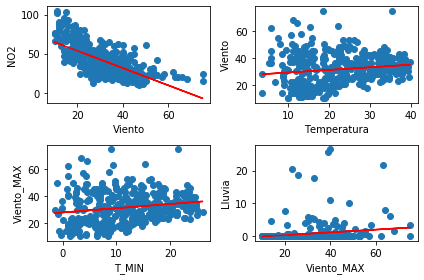

In [11]:
# subplot
fig, ax = plt.subplots(nrows=4, ncols=1)
# //////
linear_regressor = LinearRegression() 

x = mNew['Viento_MAX']
y = mNew['NO2']

X = x.values.reshape(-1, 1)  
Y = y.values.reshape(-1, 1)  
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)  
plt.subplot(2, 2, 1)
plt.scatter(X, Y)
plt.xlabel("Viento")
plt.ylabel("NO2")
plt.plot(X, Y_pred, color='red')

x = mNew['T_MAX']
y = mNew['Viento_MAX']

plt.subplot(2, 2,2)
X = x.values.reshape(-1, 1)  
Y = y.values.reshape(-1, 1)  
linear_regressor.fit(X, Y) 
Y_pred = linear_regressor.predict(X) 
plt.scatter(X, Y)
plt.xlabel("Temperatura")
plt.ylabel("Viento")
plt.plot(X, Y_pred, color='red')




plt.subplot(2, 2, 3)
x = mNew['T_MIN']
y = mNew['Viento_MAX']
X = x.values.reshape(-1, 1)  
Y = y.values.reshape(-1, 1)  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  
plt.scatter(X, Y)
plt.xlabel("T_MIN")
plt.ylabel("Viento_MAX")
plt.plot(X, Y_pred, color='red')


plt.subplot(2, 2, 4)
x = mNew['Viento_MAX']
y = mNew['Lluvia']

X = x.values.reshape(-1, 1)  
Y = y.values.reshape(-1, 1)  
linear_regressor.fit(X, Y)  
Y_pred = linear_regressor.predict(X)  
plt.scatter(X, Y)
plt.xlabel("Viento_MAX")
plt.ylabel("Lluvia")
plt.plot(X, Y_pred, color='red')
plt.tight_layout()





fig.tight_layout()
plt.show()

In [12]:
## MEDIA POR MES 
a = mNew.groupby('Mes').agg(np.mean)
a.head(13)

,Lluvia,T_MAX,T_MIN,Viento_MAX,Viento_MED,SO2,CO,NO,NO2,PM2.5,PM10,O3,TOL,BEN,EBE,TCH,NMCH,SO2_MAX,CO_MAX,NO_MAX,NO2_MAX,PM2.5_MAX,PM10_MAX,O3_MAX,TOL_MAX,BEN_MAX,EBE_MAX,TCH_MAX,NMCH_MAX
Mes,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABR,1.520000,20.580000,10.066667,37.033333,16.066667,5.256667,0.291778,8.589493,29.228140,8.527778,18.061111,64.727473,1.675556,0.451667,0.293889,1.465444,0.380222,10.400000,0.573333,27.466667,50.366667,10.300000,24.600000,79.833333,3.750000,1.283333,0.633333,1.686000,0.993667
AGO,0.151613,32.519355,19.735484,36.741935,15.838710,5.603226,0.241398,6.684140,26.321704,10.365591,26.009775,69.262673,1.742688,0.414301,0.223226,1.496720,0.211022,11.903226,0.374194,23.290323,46.741935,12.161290,34.129032,82.000000,4.064516,1.087097,0.490323,1.727742,0.426129
DIC,0.048387,13.741935,6.441935,18.677419,9.161290,11.138710,0.607419,75.064516,64.639785,22.500000,32.096774,14.515775,5.517849,1.372796,0.843656,1.462581,0.143548,19.870968,0.822581,183.387097,93.645161,26.258065,44.516129,32.580645,8.645161,2.561290,1.432258,1.626774,0.213548
ENE,0.500000,11.025806,1.883871,27.741935,12.580645,9.696774,0.594194,68.697055,66.052536,13.063441,18.156891,22.735023,5.371505,1.321828,0.973656,1.755269,0.530645,15.129032,0.903226,157.483871,99.612903,15.193548,26.354839,41.290323,13.396774,2.703226,2.319355,2.032258,0.972581
FEB,0.685714,10.846429,3.603571,37.464286,16.928571,6.453571,0.374444,15.735454,36.157244,8.166071,11.991342,47.716837,2.456190,0.716071,0.410000,1.533571,0.382440,15.071429,0.646429,43.964286,57.785714,10.178571,17.642857,66.785714,6.360714,1.857143,0.900000,1.751786,0.802500
JUL,0.164516,36.767742,23.167742,34.225806,15.709677,4.838351,0.248683,7.174205,33.185133,12.447312,29.041398,77.680580,2.368656,0.533710,0.225269,1.488925,0.254462,10.709677,0.390323,22.838710,59.032258,14.129032,36.580645,91.129032,5.880645,1.506452,0.461290,1.682581,0.507742
JUN,1.496667,31.356667,18.313333,33.633333,15.166667,5.263333,0.249593,6.352778,30.741667,11.440000,22.601263,82.297619,2.151000,0.417556,0.282222,1.483111,0.233333,11.533333,0.400000,20.900000,57.066667,13.533333,28.966667,95.166667,4.156667,1.193333,0.596667,1.639333,0.445000
MAR,1.280645,17.254839,6.780645,32.838710,15.032258,7.148746,0.377778,22.647090,41.603495,10.158602,16.998583,45.387983,2.305484,0.731452,0.519247,1.524086,0.382903,16.548387,0.680645,55.709677,61.935484,12.774194,25.096774,62.129032,4.180645,1.790323,1.106452,1.786129,0.944839
MAY,0.003226,27.419355,13.700000,36.064516,16.580645,5.206452,0.261935,8.321120,28.457749,8.805376,21.008798,70.417051,2.037742,0.414409,0.298925,1.459892,0.150000,9.354839,0.396774,25.548387,50.516129,10.774194,29.516129,84.483871,3.793548,1.106452,0.541935,1.629032,0.236774


### Ranking Por mes


|Ranking|Temperatura alta  | Temperatura baja  |  Mas viento  | Concentracion de contaminantes|
|-------|-------|--------|-------------|------------------|
|1|Julio | Enero| Febrero | **Diciembre**  |
|2|Agosto| Febrero  | Abril | **Noviembre**  |
|3|Junio | Diciembre| Agosto | **Octubre**  |
|4|Mayo  | Marzo  |  Mayo | Julio  |
|5|Septiembre| Noviembre | Julio |  Septiembre    |
|6|Abril| Abril |  Junio  |  Agosto  |
|7|**Octubre**|Octubre | Septiembre  |  Junio   |
|8|Marzo| Mayo | Marzo  |  Enero  |
|9|**Noviembre**| Septiembre| Enero   | Mayo   |
|10|**Diciembre**| Junio| **Octubre**  | Marzo  |
|11|Enero | Agosto | **Noviembre** | Abril |
|12|Febrero| Julio | **Diciembre** | Febrero |


**En Cuanto al viento**
Como podemos ver Diciembre, Noviembre y Octubre que por un lado son los meses con menos viento también son los meses donde hay una mayor concentración de moleculas contaminantes. Esto confirma que el viento influye mucho en la calidad del aire y es logico ya que sin viento dispersa la contaminación y sin este se estanca. También Las corrientes de aire generalmente están asociadas con baja presión y a muchas están acompañadas por nubes y precipitaciones que limpian la atmósfera disolviendo los contaminantes en las gotas.



**En Cuanto a la Temperatura**
Por otro lado, vemos que estos tres meses tambíen estan en sobre los meses con temperatura mas baja, lo que nos llevo a deducir que las temperaturas bajas tienen una relación directa sobre el aumento de contaminacion. El aire frío es más denso que el aire caliente y por lomismo se queda más tiempo a nivel de piso donde hay menos movimiento, lo que causa que los contaminantes se concentren mucho más. Es en estas epocas donde sucede el fenomeno de inversion termica la cual puede llevar a que la contaminación en el aire como el smog, quede atrapada cerca del suelo, y por ende mostrar mas concentracion en los reslutados.

## Analisis de la Temperatura

A continuacion queremos analizar si la temperatura sigue una distribucion normal. Para lograrlo primero se muestran graficos de probabilidad de datos de esta variable contra los cuantiles de una distribución normal. La tercera tabla es una gráfica gausseana con la que se podría llegar a concluir que la temperatura si sigue una distribución normal. Por esto seria correcto llegar a las concluciones de que la media de la temperatura en general se encuentra entre los 17 y 25 grados para todos los datos usados en el estudio.

 Todos los valores


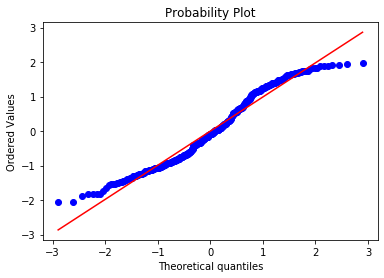

Valores Medios por mes


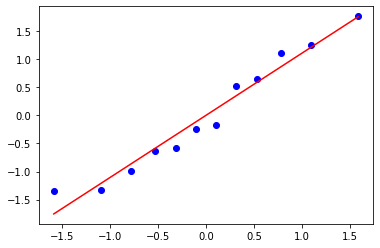

In [13]:
#Similitud entre temperatura maxima y distribucion normal
print(" Todos los valores")
z=(mNew['T_MAX']-np.mean(mNew['T_MAX']))/np.std(mNew['T_MAX'])
stats.probplot(z,dist="norm",plot=plt)
plt.title=("Q-Q plot")
plt.show()

print("Valores Medios por mes")
# Media por mes
grouped = mNew.groupby('Mes').agg(np.mean) # SACANDO LA MEDIA 
z=(grouped['T_MAX']-np.mean(grouped['T_MAX']))/np.std(grouped['T_MAX'])
stats.probplot(z,dist="norm",plot=plt)
plt.show()


Desviacion estandar 8.341056989427626
Media 22.05918266769073


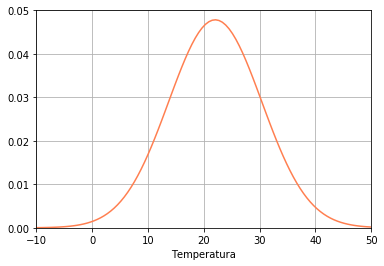

In [14]:
# Distribucion normal Gausiana para la temperatura
h = sorted(grouped['T_MAX'])
fit = stats.norm.pdf(h, np.mean(h), np.std(h))

x_min = -10
x_max = 50

mean =np.mean(h)
std = np.std(h)

x = np.linspace(x_min, x_max, 100)

y = stats.norm.pdf(x,mean,std)

print("Desviacion estandar",std)
print("Media",mean)
plt.plot(x,y, color='coral')


plt.xlim(x_min,x_max)
plt.ylim(0,0.05)
plt.xlabel('Temperatura')
plt.grid()
plt.show()


In [15]:
sk=mNew['T_MAX'].skew()
print("Skewness/Oblicuidad de la temperatura maxima", sk.round(4))

Skewness/Oblicuidad de la temperatura maxima 0.2119


Usamos el Skewness o Oblicuidad en español para poder ver la cantidad y la dirección de asimetría.  debería de dar 0 si los datos presentados siguen una distribución normal. Como vemos arriba para la temperatura máxima en este caso obtenemos una Oblicuidad de .2 lo que se encuentra dentro del rango -0.5 y 0.5 por lo tanto se confirma que la idea anterior de que la temperatura sigue una distribución simétrica por lo tanto normal.

Mes
ABR    29.228140
AGO    26.321704
DIC    64.639785
ENE    66.052536
FEB    36.157244
JUL    33.185133
JUN    30.741667
MAR    41.603495
MAY    28.457749
NOV    56.472755
OCT    42.165907
SEP    35.744867
Name: NO2, dtype: float64
 Concentracion de NO2 al Mes


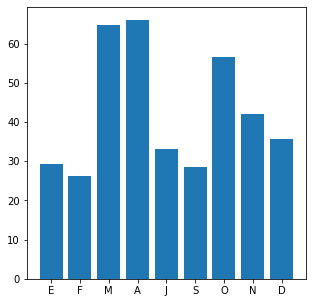

In [16]:
b = mNew.groupby('Mes').agg(np.mean)

plt.rcParams["figure.figsize"] = [5,5]
x=['E','F','M','A','M','J','J','A','S','O','N','D']
print(b['NO2'])

y = (b['NO2'])
print(" Concentracion de NO2 al Mes")
plt.bar(x,y) # A bar chart
plt.show()

<a id="PredNO2"> </a>
### Combinación de atributos para predecir NO2



 Usando el Viento_MAX para la predicción
R cuadrado (entrenamiento) =  0.4529
R cuadrado (test)=   0.379
MAE 11.8808
MSE 201.4179
Acuraccy 0.379 %


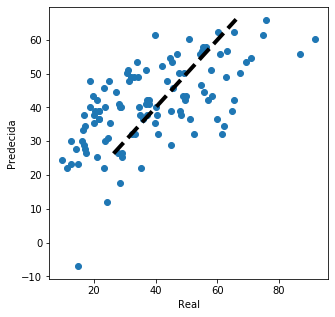

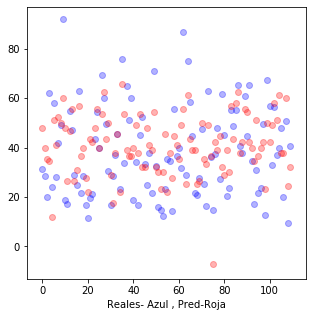

In [17]:
# SOLO VIENTO MAX
## LINEAL 
lr = LinearRegression() 

xOne = mNew[['Viento_MAX', 'NO2']].copy()
X= xOne.drop(['NO2'], axis=1).values
Y = xOne['NO2'].values


#Obtención sets entrenamiento y validación para linear regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

#Entrenar modelos
lr.fit(X_train, y_train)
y_predTr = lr.predict(X_train)
y_pred= lr.predict(X_test)

r2Tr= mtr.r2_score(y_train, y_predTr)
r2Test= mtr.r2_score(y_test, y_pred)

print(" Usando el Viento_MAX para la predicción")
#Mostrar R cuadrado
print('R cuadrado (entrenamiento) = ', round(r2Tr,4))
print('R cuadrado (test)=  ', round(r2Test,4))

#MAE Y MSE
print("MAE", round(mean_absolute_error(y_test,y_pred),4))
print("MSE", round(mean_squared_error(y_test,y_pred),4))
print("Acuraccy",  round(mtr.r2_score(y_test,y_pred),4),"%")


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predecida')
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)
plt.xlabel('Reales- Azul , Pred-Roja')
plt.show()

 Usando el Viento_MAX y T_MAX para la predicción
R cuadrado (entrenamiento) =  0.514
R cuadrado (test)=   0.4565
MAE 11.2506
MSE 176.271
Acuraccy 0.4565 %


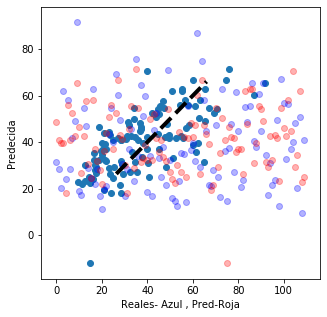

In [18]:
# VIENTO MAX TMax 
lr = LinearRegression() 

xOne = mNew[['Viento_MAX', 'T_MAX', 'NO2']].copy()
X= xOne.drop(['NO2'], axis=1).values
Y = xOne['NO2'].values


#Obtención sets entrenamiento y validación para linear regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

#Entrenar modelos
lr.fit(X_train, y_train)
y_predTr = lr.predict(X_train)
y_pred= lr.predict(X_test)

r2Tr= mtr.r2_score(y_train, y_predTr)
r2Test= mtr.r2_score(y_test, y_pred)

print(" Usando el Viento_MAX y T_MAX para la predicción")
#Mostrar R cuadrado
print('R cuadrado (entrenamiento) = ', round(r2Tr,4))
print('R cuadrado (test)=  ', round(r2Test,4))

#MAE Y MSE
print("MAE", round(mean_absolute_error(y_test,y_pred),4))
print("MSE", round(mean_squared_error(y_test,y_pred),4))
print("Acuraccy",  round(mtr.r2_score(y_test,y_pred),4),"%")


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predecida')

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)
plt.xlabel('Reales- Azul , Pred-Roja')
plt.show()

R cuadrado (entrenamiento) =  0.5169
R cuadrado (test)=   0.4573
MAE 11.2805
MSE 176.0275
Acuraccy 0.4573 %


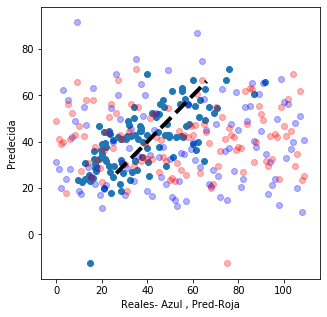

In [19]:

lr = LinearRegression() 

xOne = mNew[['Viento_MAX', 'T_MAX', 'Lluvia', 'NO2']].copy()
X= xOne.drop(['NO2'], axis=1).values
Y = xOne['NO2'].values


#Obtención sets entrenamiento y validación para linear regression
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state = 0)

#Entrenar modelos
lr.fit(X_train, y_train)
y_predTr = lr.predict(X_train)
y_pred= lr.predict(X_test)

r2Tr= mtr.r2_score(y_train, y_predTr)
r2Test= mtr.r2_score(y_test, y_pred)

#Mostrar R cuadrado
print('R cuadrado (entrenamiento) = ', round(r2Tr,4))
print('R cuadrado (test)=  ', round(r2Test,4))

#MAE Y MSE
print("MAE", round(mean_absolute_error(y_test,y_pred),4))
print("MSE", round(mean_squared_error(y_test,y_pred),4))
print("Acuraccy",  round(mtr.r2_score(y_test,y_pred),4),"%")


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Real')
ax.set_ylabel('Predecida')

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)
plt.xlabel('Reales- Azul , Pred-Roja')
plt.show()

En los resultados anteriores podemos notar que hay una relación entre la cantidad de atributos usados con los resultados que se obtienen para cada uno de los modelos. Con esto podemos conluir que entre mas atributos se usen para la preducción, mejores resultados se obtienen. En este caso esto es cierto porque estamos usando atributos que estan altamente correlacionados con el atributo que queremos predecir. Si intentaramos lo mismo con atributos que no tuvieran mucha relacion, no importa cuantos atributos usemos, los resultados no serian los deseados.

<a id="Modelos"> </a>
## MODELOS 

Para esta sección decidimos usar los siguientes modelos:
    
    Regresión logistica : Se trata de un análisis de regresión que es util para modelar la probabilidad de un evento ocurrido como función de otros factores
    
    Naive Bayes: Es un clasificador probablistico que se basa en el teorema de bayes (la probabilidad de un evento A dado otro evento B y asume que no esta relacionado).
    
    Random Forest: Es una combinacion de árboles predictores tal que al final se usa el resultado de todos para sacar la predicción final.
    
En la siguiente casilla se asignan las constantes y configuraciónes para los diferentes modelos.

In [20]:
#Constantes para los predictores
logistic = LogisticRegression()
nb = GaussianNB()
#n_estimators -> numero de arboles
rf =RandomForestClassifier(n_estimators=50, max_depth=10,random_state=10)
# Variable para el uso de KFOLDS 
kf =KFold(n_splits=10)
# Variable para el uso de KFOLDS con SHUFFLE 
kfShuffle=KFold(n_splits=10,shuffle=True)

En la siguiente casilla se ve el proceso que llevamos a cabo para partir los datos en cuatro conjuntos siendo:
 
 
    X_train, X_test: Contienen los datos de los conjuntos de train y test. 
    
    y_train, y_test:Contienen los valores deseados para los conjuntos de train y test 
    
El conjunto de test tiene el 30% de los datos mientras que el de entrenamiento usa el otro 70%. 

Ya que los modelos que usamos no aceptan valores continuos discretizamos los valores de NO2 en 5 clases que pueden ser interpretadas como : muy bajo, bajo, medio, alto.

Para poder evaluar los modelos y garantizar su generalización usamos la validación cruzada de K iteraciones (en nuestro caso 10)  con y sin shufle. En este método uno de los K subconjuntos de datos se usa como datos de prueba y el resto K-1 como datos de entrenamiento. Este proceso se realiza durante K iteraciones


In [21]:

mNew= mNew.replace(['L','M','X','J','V','S','D'],['1','2','3','4','5','6','7'])
mNew= mNew.replace(['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC'],['1','2','3','4','5','6','7','8','9','10','11','12'])

#Preparación variables para entrenamiento y validación del dataset
y = mNew['NO2']
y_discretized = pd.cut(y, bins=[0,25.6,37.08,51.26,104.88], labels=range(5 - 1))
#X = mNew.drop(['NO2','NO2_MAX','NO','NO_MAX'],axis=1)
X= mNew[['T_MAX','Viento_MED','Lluvia','T_MIN','Dia_sem','Mes']].copy()

#Obtención sets entrenamiento y validación para linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y_discretized, test_size=0.3, random_state = 0)

#Entrenar modelos
logistic.fit(X_train, y_train)
nb.fit(X_train, y_train)
rf.fit(X_train, y_train);

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<a id="rl"> </a>
### Regresor Logistico

In [22]:
print("LOGISTIC REGRESSION:\n")

y_predTr = logistic.predict(X_train)
y_pred= logistic.predict(X_test)

meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds
for trainIndex,testIndex in kf.split(X, y_discretized):
    count=count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    logistic.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(nb.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(nb.score(xTest, yTest),4)
#print ("10-Kfolds Mean accuracy train =", round(logistic.score(xTrain,yTrain),4))
#print ("10-Kfolds Mean accuracy test =", round(logistic.score(xTest,yTest),4))

print("10-Kfolds Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))


meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds with Shuffle
for trainIndex,testIndex in kfShuffle.split(X, y_discretized):
    count=count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    logistic.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(nb.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(nb.score(xTest, yTest),4)
#print ("10-Kfolds With shuffle Mean accuracy train =", round(logistic.score(xTrain,yTrain),4))
#print ("10-Kfolds With shuffle Mean accuracy test =", round(logistic.score(xTest,yTest),4))

print("10-Kfolds With shuffle Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds With shuffle Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))


print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

#Es un ratio :capacidad del clasificador para encontrar todas las muestras positivas
print( "Recall Score ", recall_score(y_test,y_pred,average='weighted'))

#Promedio ponderado de precisión donde lo mejor donde se alcanza su mejor valor en 1 y el peor en 0.
print("F1 Score ", f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))

#Puntaje que expresa el nivel de acuerdo entre dos conjuntos de datos sobre un problema de clasificación
print("Cohen Kappa ", round(cohen_kappa_score(y_test,y_pred),4))

LOGISTIC REGRESSION:

10-Kfolds Mean accuracy train = 0.4904
10-Kfolds Mean accuracy test = 0.4909
10-Kfolds With shuffle Mean accuracy train = 0.4904
10-Kfolds With shuffle Mean accuracy test = 0.4904
Confusion Matrix
[[21  8  3  2]
 [ 6 11  5  1]
 [12  3  2  9]
 [ 1  2  0 24]]

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed


Recall Score  0.5272727272727272
F1 Score  0.4865779291311207
              precision    recall  f1-score   support

           0       0.53      0.62      0.57        34
           1       0.46      0.48      0.47        23
           2       0.20      0.08      0.11        26
           3       0.67      0.89      0.76        27

    accuracy                           0.53       110
   macro avg       0.46      0.52      0.48       110
weighted avg       0.47      0.53      0.49       110

Cohen Kappa  0.3613


#### Resutados del modelo 
Podemos notar valores bastante bajos en cuanto a la precision media  en la predicción de los resultados. Esto se pude deber a ruido en los atributos o en los mismos datos que se usan.
En la matriz de confusión se puede ver como el modelo falla mas en las clases medias de NO2 'bajo' Y 'medio' mientras que 'muyBajo' y 'alto' tienen un porcentaje de instancias correctamente clasificadas mas alto. Esto puede ocurrir por el hecho que existan una cantidad mas alta de este tipo de instancias, por lo que el modelo se puede estar acostumbrando a ellas.

<a id="nb"> </a>
### Naive Bayes

In [23]:
print("NAIVE BAYES:\n")

y_predTr = nb.predict(X_train)
y_pred= nb.predict(X_test)

meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0


#Kfolds
for trainIndex,testIndex in kf.split(X, y_discretized):
    count = count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    nb.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(nb.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(nb.score(xTest, yTest),4)
    #print ("10-Kfolds Mean accuracy train =", round(nb.score(xTrain,yTrain),4))
    #print ("10-Kfolds Mean accuracy test =", round(nb.score(xTest,yTest),4))

print("10-Kfolds Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))

meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds with Shuffle
for trainIndex,testIndex in kfShuffle.split(X, y_discretized):
    count=count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    nb.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(nb.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(nb.score(xTest, yTest),4)
    #print ("10-Kfolds With shuffle Mean accuracy train =", round(nb.score(xTrain,yTrain),4))
    #print ("10-Kfolds With shuffle Mean accuracy test =", round(nb.score(xTest, yTest),4))

print("10-Kfolds With shuffle Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds With shuffle Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))


print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

#Es un ratio :capacidad del clasificador para encontrar todas las muestras positivas
print( "Recall Score " ,recall_score(y_test,y_pred,average='weighted'))

#Promedio ponderado de precisión donde lo mejor donde se alcanza su mejor valor en 1 y el peor en 0.
print("F1 Score ", f1_score(y_test,y_pred,average='weighted') , "Best 1 Worst 0")
print(classification_report(y_test,y_pred))

#Puntaje que expresa el nivel de acuerdo entre dos conjuntos de datos sobre un problema de clasificación
print("Cohen Kappa ", round(cohen_kappa_score(y_test,y_pred),4))




NAIVE BAYES:

10-Kfolds Mean accuracy train = 0.4782
10-Kfolds Mean accuracy test = 0.4447
10-Kfolds With shuffle Mean accuracy train = 0.4828
10-Kfolds With shuffle Mean accuracy test = 0.4484
Confusion Matrix
[[21  4  3  6]
 [ 3  5  6  9]
 [ 1  2 10 13]
 [ 0  1  1 25]]
Recall Score  0.5545454545454546
F1 Score  0.5359469657093091 Best 1 Worst 0
              precision    recall  f1-score   support

           0       0.84      0.62      0.71        34
           1       0.42      0.22      0.29        23
           2       0.50      0.38      0.43        26
           3       0.47      0.93      0.62        27

    accuracy                           0.55       110
   macro avg       0.56      0.54      0.51       110
weighted avg       0.58      0.55      0.54       110

Cohen Kappa  0.4026


#### Resultados modelo
Al igual que en el modelo anterior, se obtienen valores bastante bajos para la presición del modelo y lo mas posible es que sea por las mismas razones mencionadas anteriormente.
En este caso en la matriz de confusión se puede ver que también este modelo tiene un porcentaje mas alto de instancias correctamente clasificadas en las dos clases extremo. Algo a destacar aqui es que el modelo logistico hacia un mejor trabajo con la clase 'bajo' que 'medio' cuando aqui es completamente al revez. Esto puede provocarse por como los dos modelos se adaptan a diferentes tipos de dato que usan para la predicción.

<a id="arboles"> </a>
### Modelo Basado en Arboles de predicción
### Random Forest

In [25]:
y_predTr = rf.predict(X_train)
y_pred= rf.predict(X_test)


meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds
for trainIndex,testIndex in kf.split(X, y_discretized):
    count = count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    rf.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(rf.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(rf.score(xTest, yTest),4)
    #print ("10-Kfolds Mean accuracy train =", round(rf.score(xTrain,yTrain),4))
    #print ("10-Kfolds Mean accuracy test =", round(rf.score(xTest,yTest),4))

print("10-Kfolds Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))

meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds with Shuffle
for trainIndex,testIndex in kfShuffle.split(X, y_discretized):
    count=count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    rf.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(rf.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(rf.score(xTest, yTest),4)
    #print ("10-Kfolds With shuffle Mean accuracy train =", round(rf.score(xTrain,yTrain),4))
    #print ("10-Kfolds With shuffle Mean accuracy test =", round(rf.score(xTest, yTest),4))

print("10-Kfolds With shuffle Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds With shuffle Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))


print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

#Es un ratio :capacidad del clasificador para encontrar todas las muestras positivas
print( "Recall Score " ,recall_score(y_test,y_pred,average='weighted'))

#Promedio ponderado de precisión donde lo mejor donde se alcanza su mejor valor en 1 y el peor en 0.
print("F1 Score ", f1_score(y_test,y_pred,average='weighted') , "Best 1 Worst 0")
print(classification_report(y_test,y_pred))

#Puntaje que expresa el nivel de acuerdo entre dos conjuntos de datos sobre un problema de clasificación
print("Cohen Kappa ", round(cohen_kappa_score(y_test,y_pred),4))





10-Kfolds Mean accuracy train = 0.9921
10-Kfolds Mean accuracy test = 0.4468
10-Kfolds With shuffle Mean accuracy train = 0.9909
10-Kfolds With shuffle Mean accuracy test = 0.5173
Confusion Matrix
[[33  1  0  0]
 [ 0 22  1  0]
 [ 1  0 25  0]
 [ 0  1  0 26]]
Recall Score  0.9636363636363636
F1 Score  0.9638407357395716 Best 1 Worst 0
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        34
           1       0.92      0.96      0.94        23
           2       0.96      0.96      0.96        26
           3       1.00      0.96      0.98        27

    accuracy                           0.96       110
   macro avg       0.96      0.96      0.96       110
weighted avg       0.96      0.96      0.96       110

Cohen Kappa  0.9512


De los tres modelos random forest es el que mejor presición tiene entre los datos predecidos y los reales. Se puede ver claramente en la matriz de confusión como la tasa de instancias correctamente clasificadas aumenta considerablemente, sobretodo destacando las clases medias 'bajo' 'medio' que en modelos anteriores tenian porcentajes considerablemente menores. La considerable mejora de los resultados posiblemente es causada por el hecho de que random forest utiliza una mezcla de diferentes árboles de decision para dar el resultado final, por lo que se toman muchas salidas en cuenta.



## Detectando Valores Atípicos

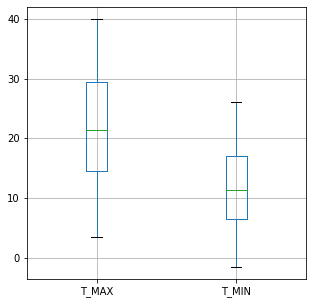

In [26]:

mNew.boxplot(column=['T_MAX','T_MIN'])


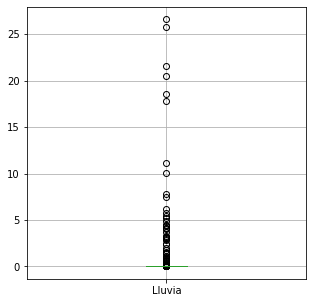

In [27]:
mNew.boxplot(column=['Lluvia'])

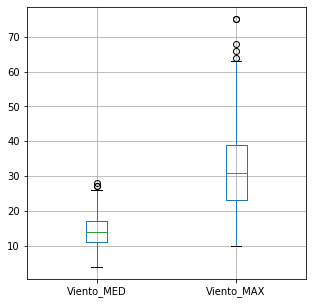

In [28]:
mNew.boxplot(column=['Viento_MED','Viento_MAX'])


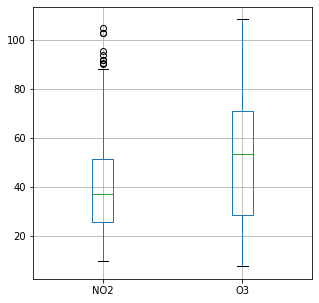

In [29]:
mNew.boxplot(column=['NO2','O3'])

## Nuevos Modelos

Para intentar mejorar los resultados obtenidos por los modelos decidimos hacer los siguientes cambios:

        1- Deshacernos de los valoes atipicos dentro de la columna de datos de NO2: Al ver el boxPLot creado antes con esta variable decidimos eliminar todos los datos a partir de 85.
        2- Normalizar los datos 
        3- Cambiar la columna de Viento_MED por el Viento_MAX ya que observamos que producia mejores resultados.

Probamos diferentes combinaciones de atributos para ver como cambiaban los resultados y notamos. Lo primero que intentamos quitar era la lluvia, pero como se ve en la sección de correlación, este es un atributo que influye mucho sobre la existencia o no de contaminantes por lo que es lógico que los  resultados bajen. Otros atributos que probamos eliminar son el Dia de la semana y el mes ya que al estar codificados con números pensamos que esto solo causaría ruido para la predicción, pero por los resultados obtenidos sin ellos concideramos que si pueden ser necesarios.

In [30]:
#NUEVOS MODELOS
rowIndex=0
for data in mNew['NO2']:
     if data>85:
        mNew=mNew.drop(rowIndex)
        rowIndex=rowIndex+1
        
cols = mNew.columns   
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(mNew)
df_normalized = pd.DataFrame(np_scaled, columns = cols)


#Preparación variables para entrenamiento y validación del dataset
y = mNew['NO2']
y_discretized = pd.cut(y, bins=[0,25.6,37.08,51.26,104.88], labels=range(5 - 1))
X= df_normalized[['T_MAX','Viento_MAX','Lluvia','T_MIN','Dia_sem','Mes']].copy()

#Obtención sets entrenamiento y validación para linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y_discretized, test_size=0.3, random_state = 0)


#Obtención sets entrenamiento y validación para linear regression
X_train, X_test, y_train, y_test = train_test_split(X, y_discretized, test_size=0.3, random_state = 0)

#Entrenar modelos
logistic.fit(X_train, y_train)
nb.fit(X_train, y_train)
rf.fit(X_train, y_train);



/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


### Logistic

In [31]:
print("LOGISTIC REGRESSION:\n")

y_predTr = logistic.predict(X_train)
y_pred= logistic.predict(X_test)

meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds
for trainIndex,testIndex in kf.split(X, y_discretized):
    count=count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    logistic.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(nb.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(nb.score(xTest, yTest),4)
#print ("10-Kfolds Mean accuracy train =", round(logistic.score(xTrain,yTrain),4))
#print ("10-Kfolds Mean accuracy test =", round(logistic.score(xTest,yTest),4))

print("10-Kfolds Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))



meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds with Shuffle
for trainIndex,testIndex in kfShuffle.split(X, y_discretized):
    count=count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    logistic.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(nb.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(nb.score(xTest, yTest),4)
#print ("10-Kfolds With shuffle Mean accuracy train =", round(logistic.score(xTrain,yTrain),4))
#print ("10-Kfolds With shuffle Mean accuracy test =", round(logistic.score(xTest,yTest),4))

print("10-Kfolds With shuffle Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds With shuffle Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))


print("Confusion Matrix")
print(confusion_matrix(y_test,y_pred))

#Es un ratio :capacidad del clasificador para encontrar todas las muestras positivas
print( "Recall Score ", recall_score(y_test,y_pred,average='weighted'))

#Promedio ponderado de precisión donde lo mejor donde se alcanza su mejor valor en 1 y el peor en 0.
print("F1 Score ", f1_score(y_test,y_pred,average='weighted'))
print(classification_report(y_test,y_pred))

#Puntaje que expresa el nivel de acuerdo entre dos conjuntos de datos sobre un problema de clasificación
print("Cohen Kappa ", round(cohen_kappa_score(y_test,y_pred),4))

LOGISTIC REGRESSION:

10-Kfolds Mean accuracy train = 0.4915
10-Kfolds Mean accuracy test = 0.4915
10-Kfolds With shuffle Mean accuracy train = 0.4915
10-Kfolds With shuffle Mean accuracy test = 0.4918
Confusion Matrix
[[22  5  2  0]
 [10 11  3  0]
 [11  7  3  5]
 [ 2  3  8 14]]
Recall Score  0.4716981132075472
F1 Score  0.4523802977945718
              precision    recall  f1-score   support

           0       0.49      0.76      0.59        29
           1       0.42      0.46      0.44        24
           2       0.19      0.12      0.14        26
           3       0.74      0.52      0.61        27

    accuracy                           0.47       106
   macro avg       0.46      0.46      0.45       106
weighted avg       0.46      0.47      0.45       106

Cohen Kappa  0.2915


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

#### Resultados del modelo
Con las transformaciónes hechas a los datos no logramos conseguir una mejora significante en cuanto a la presición de los resultados. 
Aunque la tendencia de predecir mejor las clases extremo continua, en este caso se puede ver como las clases medias tienden a ser predecidas como mas bajas de las que en realidad son, cuando en el modelo logístico anterior los datos no mostraban ningún tipo de patrón.


### Naive Bayes

In [32]:
print("NAIVE BAYES:\n")

y_predTr = nb.predict(X_train)
y_pred= nb.predict(X_test)

meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0


#Kfolds
for trainIndex,testIndex in kf.split(X, y_discretized):
    count = count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    nb.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(nb.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(nb.score(xTest, yTest),4)
    #print ("10-Kfolds Mean accuracy train =", round(nb.score(xTrain,yTrain),4))
    #print ("10-Kfolds Mean accuracy test =", round(nb.score(xTest,yTest),4))

print("10-Kfolds Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))

meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds with Shuffle
for trainIndex,testIndex in kfShuffle.split(X, y_discretized):
    count=count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    nb.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(nb.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(nb.score(xTest, yTest),4)
    #print ("10-Kfolds With shuffle Mean accuracy train =", round(nb.score(xTrain,yTrain),4))
    #print ("10-Kfolds With shuffle Mean accuracy test =", round(nb.score(xTest, yTest),4))

print("10-Kfolds With shuffle Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds With shuffle Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))


print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

#Es un ratio :capacidad del clasificador para encontrar todas las muestras positivas
print( "Recall Score " ,recall_score(y_test,y_pred,average='weighted'))

#Promedio ponderado de precisión donde lo mejor donde se alcanza su mejor valor en 1 y el peor en 0.
print("F1 Score ", f1_score(y_test,y_pred,average='weighted') , "Best 1 Worst 0")
print(classification_report(y_test,y_pred))

#Puntaje que expresa el nivel de acuerdo entre dos conjuntos de datos sobre un problema de clasificación
print("Cohen Kappa ", round(cohen_kappa_score(y_test,y_pred),4))





NAIVE BAYES:

10-Kfolds Mean accuracy train = 0.4817
10-Kfolds Mean accuracy test = 0.4604
10-Kfolds With shuffle Mean accuracy train = 0.4798
10-Kfolds With shuffle Mean accuracy test = 0.4605
Confusion Matrix
[[17  3  5  4]
 [ 7  4  6  7]
 [ 5  2  8 11]
 [ 0  0  0 27]]
Recall Score  0.5283018867924528
F1 Score  0.48346072442398164 Best 1 Worst 0
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        29
           1       0.44      0.17      0.24        24
           2       0.42      0.31      0.36        26
           3       0.55      1.00      0.71        27

    accuracy                           0.53       106
   macro avg       0.50      0.52      0.47       106
weighted avg       0.50      0.53      0.48       106

Cohen Kappa  0.3662


Podemos ver una pequeña mejora en los resultados. Igual que en los primeros modelos se ve una relación cotraria con el modelo logístico ya que en este caso las clases se "Sobre estiman".

### Random Forest

In [33]:
print("Random Forest:\n")
predictionsTest = rf.predict(X_test)
predictionsTrain = rf.predict(X_train)


meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds
for trainIndex,testIndex in kf.split(X, y_discretized):
    count = count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    rf.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(rf.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(rf.score(xTest, yTest),4)
    #print ("10-Kfolds Mean accuracy train =", round(rf.score(xTrain,yTrain),4))
    #print ("10-Kfolds Mean accuracy test =", round(rf.score(xTest,yTest),4))

print("10-Kfolds Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))

meanMeanAccuraccyTrain=0
meanMeanAccuraccyTest=0
count=0

#Kfolds with Shuffle
for trainIndex,testIndex in kfShuffle.split(X, y_discretized):
    count=count+1
    xTrain,xTest = X.iloc[trainIndex],X.iloc[testIndex]
    yTrain, yTest = y_discretized.iloc[trainIndex],y_discretized.iloc[testIndex]
    rf.fit(xTrain,yTrain)
    meanMeanAccuraccyTrain= meanMeanAccuraccyTrain+round(rf.score(xTrain,yTrain),4)
    meanMeanAccuraccyTest=meanMeanAccuraccyTest + round(rf.score(xTest, yTest),4)
    #print ("10-Kfolds With shuffle Mean accuracy train =", round(rf.score(xTrain,yTrain),4))
    #print ("10-Kfolds With shuffle Mean accuracy test =", round(rf.score(xTest, yTest),4))

print("10-Kfolds With shuffle Mean accuracy train =",round(meanMeanAccuraccyTrain/count,4))
print("10-Kfolds With shuffle Mean accuracy test =",round(meanMeanAccuraccyTest/count,4))


print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))

#Es un ratio :capacidad del clasificador para encontrar todas las muestras positivas
print( "Recall Score " ,recall_score(y_test,y_pred,average='weighted'))

#Promedio ponderado de precisión donde lo mejor donde se alcanza su mejor valor en 1 y el peor en 0.
print("F1 Score ", f1_score(y_test,y_pred,average='weighted') , "Best 1 Worst 0")
print(classification_report(y_test,y_pred))

#Puntaje que expresa el nivel de acuerdo entre dos conjuntos de datos sobre un problema de clasificación
print("Cohen Kappa ", round(cohen_kappa_score(y_test,y_pred),4))






Random Forest:

10-Kfolds Mean accuracy train = 0.9817
10-Kfolds Mean accuracy test = 0.4693
10-Kfolds With shuffle Mean accuracy train = 0.9836
10-Kfolds With shuffle Mean accuracy test = 0.5452
Confusion Matrix
[[17  3  5  4]
 [ 7  4  6  7]
 [ 5  2  8 11]
 [ 0  0  0 27]]
Recall Score  0.5283018867924528
F1 Score  0.48346072442398164 Best 1 Worst 0
              precision    recall  f1-score   support

           0       0.59      0.59      0.59        29
           1       0.44      0.17      0.24        24
           2       0.42      0.31      0.36        26
           3       0.55      1.00      0.71        27

    accuracy                           0.53       106
   macro avg       0.50      0.52      0.47       106
weighted avg       0.50      0.53      0.48       106

Cohen Kappa  0.3662


Como antes, entre los tres modelos es el que mejores resultados obtiene pero en comparación con el modelo de random forest creado al principio este es bastante peor. Llegamos a esta conclusión al ver el procentaje de instancias clasificadas correctamente. Observando la matriz se puede ver como el primer modelo de random forest tenia mayores cifras en la diagonal, por lo que habia un mayor número de instancias predecidas correctamente.
El hecho de que estos valores hayan decrecido se puede deber a que quitamos algúno de los atributos críticos que usaban los árboles de decisión.